In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import timeit
from rpl import RadarSignalProcessing
import sys
from DBReader.DBReader import SyncReader

## 1. Load the dataset

In [2]:
root_folder ='RADIal/RECORD@2020-11-22_12.54.38'
db = SyncReader(root_folder,tolerance=40000,offset_radar = -180000,offset_scala = -40000)

-------------------------------------------------------------------------
- Sensors available:
-     radar_ch2
-     camera
-     scala
-     radar_ch1
-     radar_ch3
-     gps
-     radar_ch0
-
- You might use function "setSensorFilters" to select sensors you want to read!
-------------------------------------------------------------------------
Total tolerance errors:  0.21645021645021645 %
Total corrupted frames:  2.1645021645021645 %


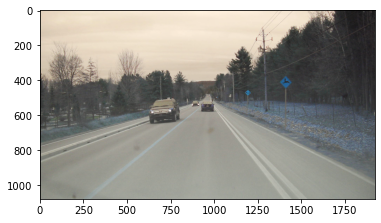

In [3]:
sample = db.GetSensorData(68)
plt.imshow(sample['camera']['data'])

## 2. RadarSignalProcessing to compute Point Cloud 

In [4]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='PC')

CPU will be used to execute the processing


In [5]:
%time pc=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 1.17 s, sys: 100 ms, total: 1.28 s
Wall time: 258 ms


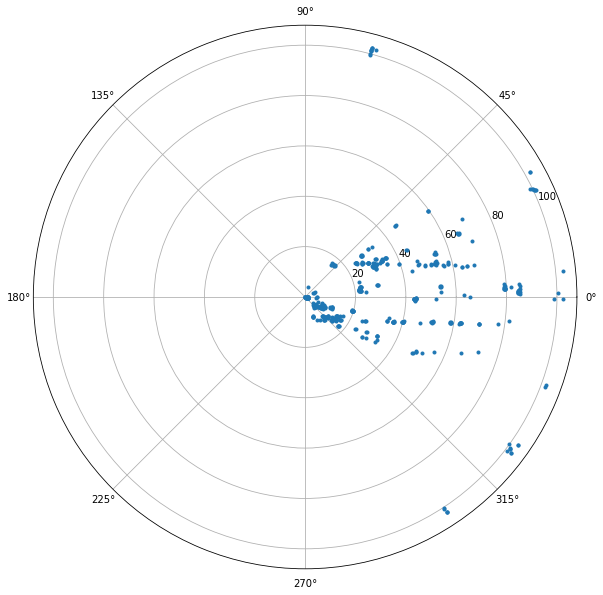

In [6]:
# PC = [Range,Doppler,Azimuth,Elevation]
Az = pc[:,2]
R = pc[:,0]
plt.figure(figsize=(10,10))
plt.polar(Az,R,'.')

## 3. RadarSignalProcessing to compute Doppler Spectrums

In [7]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='RD')

CPU will be used to execute the processing


In [8]:
%time rd=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 388 ms, sys: 35.1 ms, total: 423 ms
Wall time: 110 ms


(512, 256, 16) It has 16 channels, one for each Rx antenna


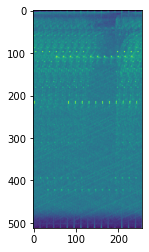

In [9]:
print(rd.shape,'It has 16 channels, one for each Rx antenna')
plt.imshow(np.log10(np.sum(np.abs(rd),axis=2)))

## 4. RadarSignalProcessing to compute Range-Azimuth map

### 4.1 Using CuPy

In [10]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='RA',device='cuda',lib='CuPy')

CuPy on GPU will be used to execute the processing


In [11]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 1.86 s, sys: 236 ms, total: 2.1 s
Wall time: 1.01 s


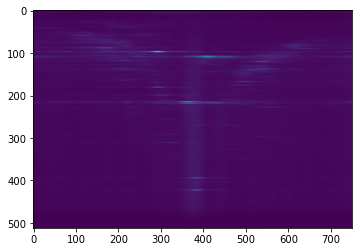

In [12]:
plt.imshow(ra)

### 4.2 Using PyTorch

In [13]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='RA',device='cuda',lib='PyTorch')

PyTorch on GPU will be used to execute the processing


In [14]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 1.58 s, sys: 104 ms, total: 1.69 s
Wall time: 384 ms


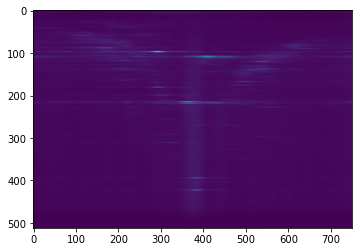

In [15]:
plt.imshow(ra)

### 4.3 Using CPU

In [16]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='RA',device='cpu')

CPU will be used to execute the processing


In [17]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 6.72 s, sys: 2.03 s, total: 8.75 s
Wall time: 3.42 s


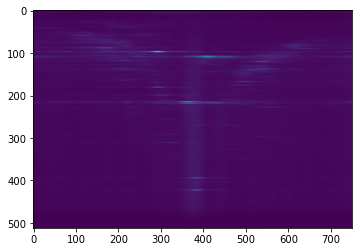

In [18]:
plt.imshow(ra)